In [ ]:
print('Name')
print('Create a GUI to read any CSV, clean the data, and create widgets to select the column names, and graph type')

G:\Whitehat Jr\Whitehat-Python\ADV-200\Class\heart_failure_clinical_records_dataset.csv


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


interactive(children=(Dropdown(description='groupbyCol', options=('age', 'anaemia', 'creatinine_phosphokinase'…

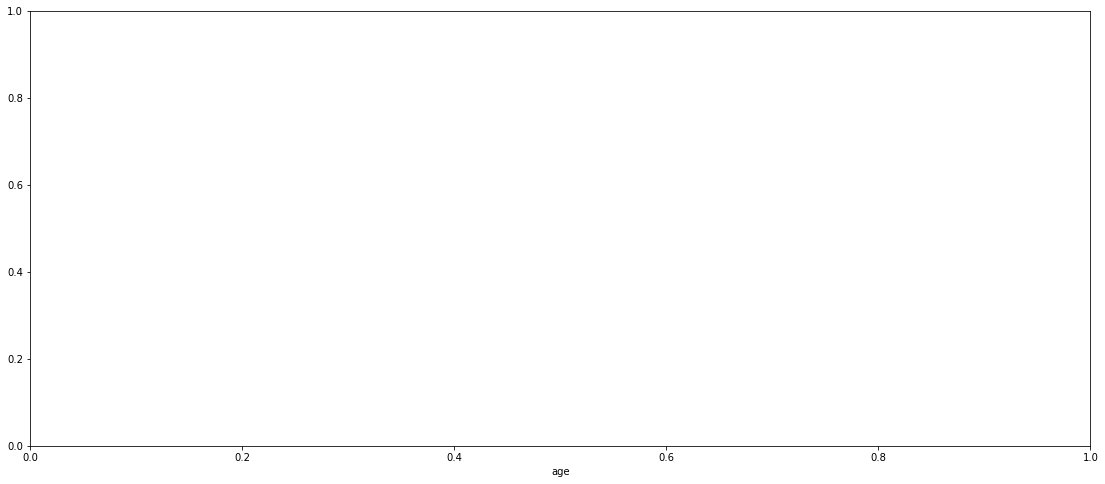

In [9]:
from ipywidgets import widgets
import IPython.display
import pandas as pd
from ipyfilechooser import FileChooser
import matplotlib.pyplot as plt 

graphType = ['Choose one.. ','line','bar']
operations =['choose','mean','max','min','sum','count']
df = ''
newDf = ''


def selectFiles(b):
    IPython.display.clear_output()
    global df
    global graphType
    df = pd.read_csv(fc.selected)
    print(fc.selected)
    df.replace( '', float('nan'), inplace=True)
    df.replace( '', float('nan'), inplace=True)
    df.dropna(inplace=True)
    IPython.display.display(df)
    groupbyWidget = widgets.Dropdown(options = df.columns)
    operationColWidget = widgets.Dropdown(options = df.columns)
    operationWidget = widgets.Dropdown(options = operations)
    groupbyInt = widgets.interactive(groupbyDf, groupbyCol = groupbyWidget, operationCol = operationColWidget, operation = operationWidget)
    IPython.display.display(groupbyInt)

def getWidget():
    global df
    global newDf
    global graphType
    xlabelWidget = widgets.Dropdown(options = newDf.columns)   
    ylabelWidget = widgets.Dropdown(options = newDf.columns)
    graphWidget = widgets.Dropdown(options = graphType)
    graph = widgets.interactive(displayPlot, xaxis=xlabelWidget, yaxis= ylabelWidget, graphType = graphWidget)
    IPython.display.display(graph)

def groupbyDf(groupbyCol, operationCol, operation):
    global df
    global newDf
    if operation=='mean':
        newDf = df.groupby(groupbyCol)[operationCol].mean().reset_index()
    elif operation=='max':
        newDf = df.groupby(groupbyCol)[operationCol].max().reset_index()
    elif operation=='min':
        newDf = df.groupby(groupbyCol)[operationCol].min().reset_index()
    elif operation=='sum':
        newDf = df.groupby(groupbyCol)[operationCol].sum().reset_index()
    elif operation=='count':
        newDf = df.groupby(groupbyCol)[operationCol].count().reset_index()
    
    IPython.display.display(newDf)
    getWidget()

def displayPlot(xaxis, yaxis, graphType):
    global newDf
    if(graphType == 'line'):
        plt.subplots(figsize=(19,8))
        plt.plot(newDf[xaxis], newDf[yaxis], linewidth=3.0)
        plt.xlabel(xaxis)
        plt.ylabel(yaxis)
        plt.show()
    elif(graphType == 'bar'):
        plt.subplots(figsize=(19,8))
        plt.bar(newDf[xaxis], newDf[yaxis], color=['red', 'green','blue','yellow','pink'])
        plt.xlabel(xaxis)
        plt.xticks(rotation='vertical')
        plt.ylabel(yaxis)
        plt.show()
    else:
        print("Choose valid graph")
    

fc = FileChooser()
fc.register_callback(selectFiles)
IPython.display.display(fc)
